# Определение перспективного тарифа для телеком-компании
Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
В проекте представлен предварительный анализ тарифов на небольшой выборке клиентов. Предоставлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов:**
+ Тариф «Смарт»:
 1. Ежемесячная плата: 550 рублей
 2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей
+ Тариф «Ультра»:
 1. Ежемесячная плата: 1950 рублей
 2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"></li></ul></div>

## 1. Изучение данных из файла

In [1]:
from scipy import stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML

In [2]:
import os
pth1 = 'calls.csv'
pth2 = '/datasets/calls.csv'
if os.path.exists(pth1):
    calls = pd.read_csv(pth1)
elif os.path.exists(pth2):
    calls = pd.read_csv(pth2)
else:
    print('Something is wrong')
calls.info()
calls.head()

In [3]:
# проверим дубликаты
calls.duplicated().sum()

In [4]:
pth1 = 'internet.csv'
pth2 = '/datasets/internet.csv'
if os.path.exists(pth1):
    internet = pd.read_csv(pth1)
elif os.path.exists(pth2):
    internet = pd.read_csv(pth2)
else:
    print('Something is wrong')

internet.info()
internet.head(10)

In [5]:
# проверим дубликаты
internet.duplicated().sum()

In [6]:
pth1 = 'messages.csv'
pth2 = '/datasets/messages.csv'
if os.path.exists(pth1):
    messages = pd.read_csv(pth1)
elif os.path.exists(pth2):
    messages = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
messages.info()
messages.head(10)

In [7]:
# проверим дубликаты
internet.duplicated().sum()

In [8]:
pth1 = 'tariffs.csv'
pth2 = '/datasets/tariffs.csv'
if os.path.exists(pth1):
    tariffs = pd.read_csv(pth1)
elif os.path.exists(pth2):
    tariffs = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
tariffs.info()
tariffs.head(10)

In [9]:
pth1 = 'users.csv'
pth2 = '/datasets/users.csv'
if os.path.exists(pth1):
    users = pd.read_csv(pth1)
elif os.path.exists(pth2):
    users = pd.read_csv(pth2)
else:
    print('Something is wrong')

users.info()
users.head(10)

In [10]:
# проверим дубликаты
users.duplicated().sum()

In [11]:
users.isnull().sum(axis=0)

**Нам представлены данные по 500 клиентам, дубликатов в данных нет, есть пропуски в таблице users в дате прекращения пользования тарифом. В предобработке данных необходимо будет округлить минуты разговора и привести данные к нужному типу (минуты - к целочисленному, дату - к datetime)** 

## 2. Предобработка данных

**Округлим минуты разговора до целых значений и приведем их к целому типу, приведем дату звонков к типу datetime в таблице "calls" и добавим в таблицу месяц, когда был совершен звонок**

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [13]:
calls['month'] = calls['call_date'].dt.month 

In [14]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [15]:
calls.head()

**В таблице "internet" приведем дату сессии к типу datetime и добавим в таблицу столбец с указаием месяца сессии**

In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [17]:
internet['month'] = internet['session_date'].dt.month

In [18]:
internet.info()

**В таблице "message" приведем дату к типу datetime и добавим столбец с указанием месяца сообщения** 

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [20]:
messages['month'] = messages['message_date'].dt.month

In [21]:
messages.head()

**в таблице "users" приведем дату регистрации к типу datetime**

In [22]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

**Найдем для каждого пользователья количество сделанных звонков и израсходованных минут разговора по месяцам**

In [23]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], aggfunc={'call_date':'count', 'duration':sum}) 
calls_pivot.columns = ['calls_count', 'calls_duration']
calls_pivot.head(10)

**найдем для каждого пользователья количество отправленных сообщений по месяцам**

In [24]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], aggfunc= {'user_id':'count'}) 
messages_pivot.columns = ['messages_count']
messages_pivot.head(10)

**для каждого пользователья найдем количество истраченных в месяц мегабайт**

In [25]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], aggfunc={'mb_used':'sum'}) 
internet_pivot.columns = ['mb_used_sum']
internet_pivot.head(10)

**объединим в общую таблицу количество и продолжительность звонков, количество сообщений и интернет траффик для каждого пользователья по месяцам**

In [26]:
df_ = calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer')
df = df_.merge(internet_pivot, on=['user_id', 'month'], how='outer')
df.head(3)

In [27]:
#найдем пользователей тарифа смарт и выделим их в отдельную таблицу
users_smart = list(users.query('tariff == "smart"')['user_id'])
df_smart = df.query('user_id in @users_smart')
df_smart = df_smart.fillna(0)
df_smart.head()

In [28]:
#составим отдельную таблицу для пользователей тарифа ультра
df_ultra = df.query('user_id not in @users_smart')
df_ultra = df_ultra.fillna(0)
df_ultra.head()

**напишем функцию, рассчитывающую доход с каждого пользователя в месяц в зависимости от выбранного тарифа**

In [29]:
#t - номер тарифа
def count_range(row, t = 0):
    over_duration = row['calls_duration'] - tariffs.loc[t, 'minutes_included']
    if over_duration < 0:
        over_duration = 0
    over_messages = row['messages_count'] - tariffs.loc[t, 'messages_included']
    if over_messages < 0:
        over_messages = 0
    over_internet = row['mb_used_sum'] - tariffs.loc[t, 'mb_per_month_included']
    if over_internet < 0:
        over_internet = 0
    return (tariffs.loc[t, 'rub_monthly_fee'] + 
            over_duration*tariffs.loc[t, 'rub_per_minute'] + 
            over_messages*tariffs.loc[t, 'rub_per_message'] + 
            np.ceil(over_internet/1024) * tariffs.loc[t, 'rub_per_gb'])

In [30]:
#рассчитаем доход с каждого пользователя тарифа смарт и добавим в таблицу
df_smart['profit'] = df_smart.apply(lambda row: count_range(row, 0), axis=1)
df_smart.head()

In [31]:
#рассчитаем доход с каждого пользователя тарифа смарт и добавим в таблицу
df_ultra['profit'] = df_ultra.apply(lambda row: count_range(row, 1), axis=1)
df_ultra.head(5)

In [32]:
# посмотри соотношение данных по обоим тарифам:
print(f'smart: {len(df_smart)}, ultra: {len(df_ultra)}')

**для дальнейшего анализа подготовлены две таблицы с пользователями тарифов smart и ultra и подсчитан доход по каждому пользователю за отдельный месяц**

## 3. Анализ данных

**посмотрим на основные показатели пользователей по каждому тарифу**

In [33]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df10,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df10.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [34]:
display_side_by_side(df_ultra.describe(), df_smart.describe(), titles=['ultra','smart'])

**Мы видим что для обоих тарифов среднее и медиана близки друг к другу, а значит данные распределены достаточно равномерно. Исключение составлют сообщения в тарифе Ультра и доход в тарифе Смарт. Видимо в данных категориях существуют значительные выбросы, мы сможем отследить это графиках. В целом все показатели по тарифу ультра выше, чем по тарифу смарт.**

In [35]:
# рассчитаем дисперсию для каждого тарифа
var_tariffs = pd.DataFrame(
    {'smart': df_smart.var(ddof=1),
     'ultra': df_ultra.var(ddof=1)
    })
pd.options.display.float_format = '{:,.2f}'.format
var_tariffs

**Дисперсия по тарифу смарт меньше, чем по тарифу ультра. Это обусловлено тем, что пакет смарт включает гораздо меньший объем минут, сообщений и интернета, а следовательно и поведение пользователей более однородно. Дисперсия дохода от ползователей по тарифу ультра значительно меньше. Покольку для данного тарифа больше минут, сообщений и мегабайт включено в тариф, пользователям реже приходится пользоваться услугами сверх тарифа**

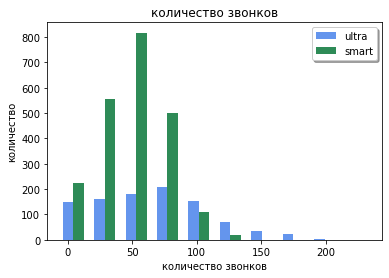

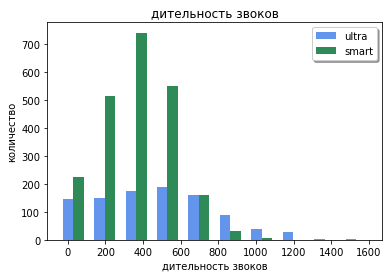

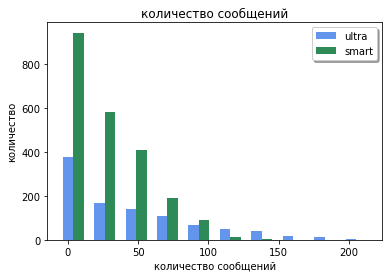

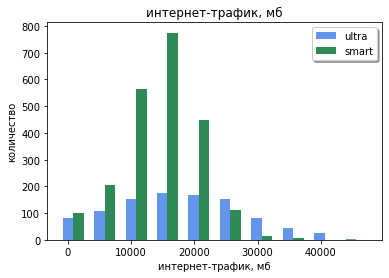

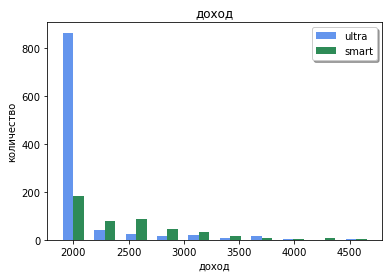

In [36]:
# построим графики, характеризующие поведение пользователей
dic = {'calls_count': 'количество звонков', 'calls_duration':'дительность звоков', 'messages_count':'количество сообщений', 'mb_used_sum':'интернет-трафик, мб', 'profit':'доход'}
for x in dic:
    fig, ax = plt.subplots()
    a_heights, a_bins = np.histogram(df_ultra[x])

    b_heights, b_bins = np.histogram(df_smart[x], bins=a_bins)

    width = (a_bins[1] - a_bins[0])/3

    ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue', label='ultra')
    ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen', label = 'smart')
    legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')
    plt.xlabel(dic[x])
    plt.ylabel('количество')
    plt.title(dic[x])
    

**Из графиков видно, что распределения для пользователей тарифа Смарт более близко к нормальному.**

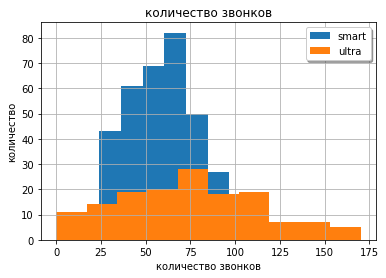

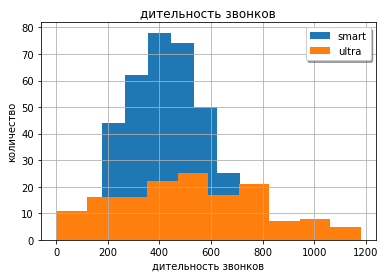

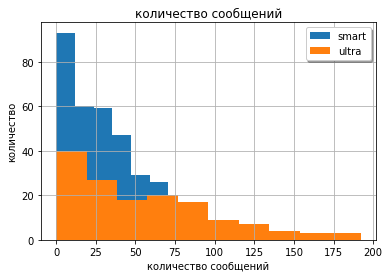

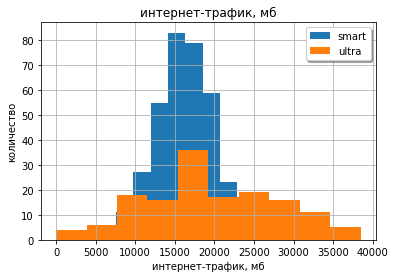

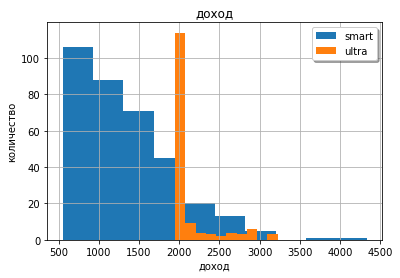

In [37]:
dic = {'calls_count': 'количество звонков', 'calls_duration':'дительность звонков', 'messages_count':'количество сообщений', 'mb_used_sum':'интернет-трафик, мб', 'profit':'доход'}
for x in dic:
    fig, ax = plt.subplots()
    df_smart.groupby(['user_id']).agg('mean')[x].hist(label='smart')
    df_ultra.groupby(['user_id']).agg('mean')[x].hist(label = 'ultra')
    legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')
    plt.xlabel(dic[x])
    plt.ylabel('количество')
    plt.title(dic[x])

**При первичном анализе среднего значения и медианы мы видели, что сообщения в тарифе Ультра и доход в тарифе Смарт имеют большую разницу между средним и медианой. Это подтверждается и графиками. Доход в тарифе Смарт имеет выбросы на значениях от 3600 (максимальное значение 6770), тогда как для тарифа Ультра значения разброманы в меньшем диапазоне (от 1950 до 4880).**

## 4.Проверка гипотез

Проверим следующую гипотезу:

H0  — средняя выручка пользователей тарифов «Ультра» и «Смарт» равны

H1  — средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны

α = 5% # критический уровень статистической значимости

In [38]:
alpha = 0.05
results = st.ttest_ind(
    df_smart['profit'], 
    df_ultra['profit'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

**Таким образом получаем, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны**

Проверим следующую гипотезу:

H0  — средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

H1  — средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов

α = 5%

**для подсчета выручки в москве и регионах объединим датафреймы** 

In [39]:
# объединим таблицы с разными тарифами в одну и найдем средний доход от каждого пользователя
df_both = pd.concat([df_smart, df_ultra]).groupby(['user_id']).agg('mean')
df_both.head()

In [40]:
# добавим в получившуюся таблицу город пользователя и заменим пропущенные значения на нули
df_both_city = df_both.merge(users[['user_id','city', 'tariff']], on='user_id', how = 'outer')
df_both_city = df_both_city.fillna(0)

In [41]:
alpha = 0.05
results = st.ttest_ind(
    df_both_city[df_both_city['city'] == 'Москва']['profit'], 
    df_both_city[df_both_city['city'] != 'Москва']['profit'], equal_var=False)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

**Таким образом средняя выручка пользователей из Москвы близка к выручке пользователей из других регионов**

## 5.Общий вывод

**В ходе проведенного анализа установлено, что в среднем доход от пользователей тарифа Смарт составляет 818 рублей, пользователей тарифа Ультра - 2070 рублей. Средняя выручка не зависит от региона пользователя. 
По обоим тарифам пользователи в среднем используют гораздо меньше лимита сообщений (49 при лимите в 100 для Ультра, 33 при лимите в 50 для Смарт).
По продолжительности звонков пользователи также укладываются в установленный лимит(417 при лимите 500 для Смарт, 526 при лимите 3000 для Ультра)
Используемый в среднем интернет-траффик для пользователей тарифа Смарт превышает заявленный(16208 при лимите 15360), пользователи Ультра в среднем укладываются в предоставленный лимит (19468 при лимите 30720).
Дисперсия по используемым услугам в тарифе Ультра выше, чем в тарифе Смарт, пользовтели более разнородны по своим предпочтениям.
Таким образом, пользователей обоих тарифов может заинтересовать предложение с большим лимитом на интеренет или возможность определять для себя подходящие лимиты.**